In [148]:
# Import Libraries
import pandas as pd
# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

# Read data
path = '01 - Data/ecom customer_data.xlsx'

In [149]:
# Read Data into a DataFrame
df = pd.read_excel(path)

In [150]:
# ------------------------------------------------------------------
# HANDLE NULLS IN THE GENDER COLUMN
# ------------------------------------------------------------------

# Fill NULLS in this new copy with new values
df['Gender'] = df['Gender'].fillna('No Gender')

# Check Unique Values in the Gender Column
# df['Gender'].unique()

In [151]:
# ------------------------------------------------------------------
# DATA TRANSFORMATIONS AND EXPLORATIONS
# ------------------------------------------------------------------

# Make a copy of the DF
df_t = df.copy()

# Group the Data by the unique values in Gender Column
# Then Aggregate the result by the sum of each occurance
df_t = df_t.groupby('Gender').sum()

# Transpose the DF
df_t = df_t.T

# New column as a sum of Males and Females
df_t['Males + Females'] = df_t['M'] + df_t['F']

# Rename and Rearrange columns
cols = {'F' : 'Females', 'M' : 'Males'}
df_t.rename(columns = cols, inplace = True)
df_t = df_t[['Males + Females', 'Females', 'Males', 'No Gender']]

# Sort Values from Highest to Lowest
df_t = df_t.sort_values(by = 'Males + Females', ascending = False)

Text(0.5, 0, 'Compaty')

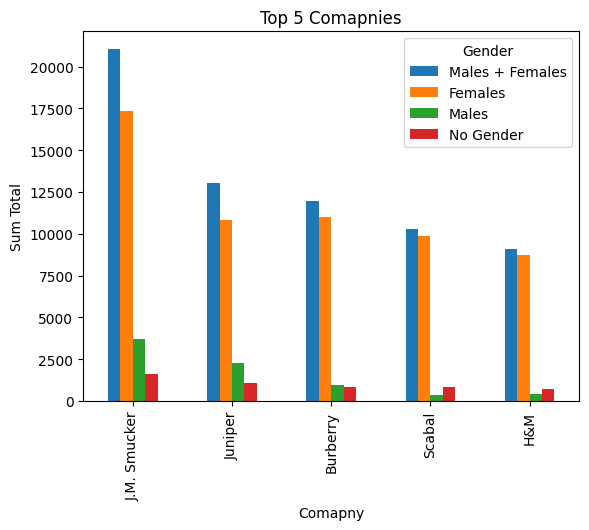

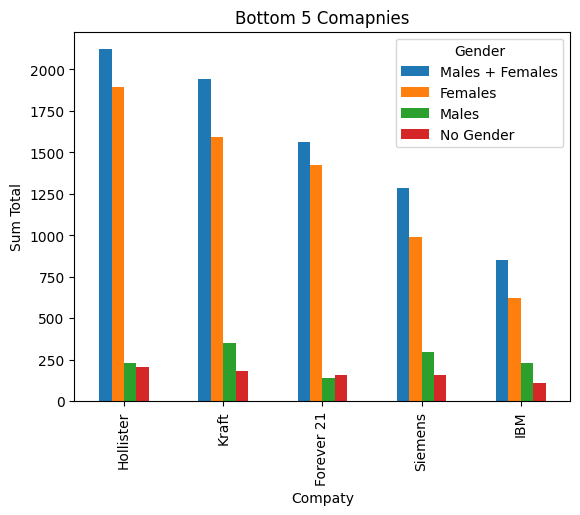

In [152]:
# Plot the Top 5
df_t[2:7].plot.bar()
plt.title('Top 5 Comapnies')
plt.ylabel('Sum Total')
plt.xlabel('Comapny')

# Plot the Bottom 5
df_t[-5:].plot.bar()
plt.title('Bottom 5 Comapnies')
plt.ylabel('Sum Total')
plt.xlabel('Compaty')

From the Bar chart arranged from the Highest to Lowest, The top 5 comapnies with the leading Market share are:
 J.M. Smucker
 Juniper
 Burberry
 Scabal
 H&M

the bottom 5 comapanies in terms of trailing market share are:
  Hollister
  Kraft
  Forever 21
  Siemens
  IBM

Females are the leading in orders followed by men and lastly those who did not disclose their gender.

In [153]:
# ------------------------------------------------------------------
# ENCODE CATEGORICAL VALUES IN THE GENDER COLUMN -> ORDINAL ENCODER
# ------------------------------------------------------------------

df2 = df.copy()

ord_enc = OrdinalEncoder()
df2 = ord_enc.fit_transform(df[['Gender']])
df3 = pd.DataFrame(df2, columns = ['Gender_Cat'])
df = pd.concat([df, df3], axis = 1)

In [154]:
# ------------------------------------------------------------------
# PREPARE MODEL DATA
# ------------------------------------------------------------------

Metrics = pd.DataFrame()
Metrics = df[['Gender_Cat', 'Orders']]
x = Metrics.values

In [155]:
# ------------------------------------------------------------------
# KMEANS CLUSTERING
# ------------------------------------------------------------------

wcss = []

for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

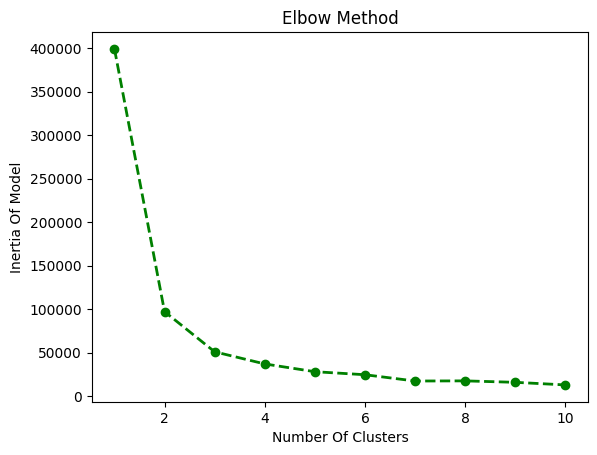

In [156]:
# plot an elbow graph
plt.plot(range(1,11),wcss,color='green', marker='o',
         linestyle='dashed',linewidth=2, markersize=6)
plt.title("Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("Inertia Of Model")
plt.show()

In [157]:
# ------------------------------------------------------------------
# ENCODE CATEGORICAL VALUES IN THE GENDER COLUMN -> ONE HOT ENCODER
# ------------------------------------------------------------------

df_enc = df.copy()
one_hot = OneHotEncoder()
df_enc = one_hot.fit_transform(df_enc[['Gender']])
df_enc = df_enc.toarray()
df_enc = pd.DataFrame(df_enc)

# Check encoded categories
# one_hot.categories_

In [158]:
# ------------------------------------------------------------------
# PREPARE MODEL DATA
# ------------------------------------------------------------------

df_OH = pd.DataFrame()
df_OH = df[['Orders']]
df_OH = pd.concat([df_OH, df_enc], axis = 1)
x2 = df_OH.values
x2


array([[7., 0., 1., 0.],
       [0., 1., 0., 0.],
       [7., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [3., 1., 0., 0.]])

In [159]:
# ------------------------------------------------------------------
# KMEANS CLUSTERING 2
# ------------------------------------------------------------------

wcss2 = []

for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x2)
    wcss2.append(kmeans.inertia_)

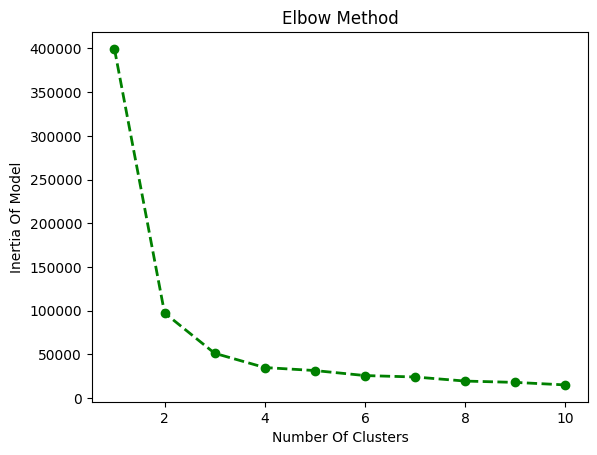

In [160]:
# plot an elbow graph
plt.plot(range(1,11),wcss2,color='green', marker='o',
         linestyle='dashed',linewidth=2, markersize=6)
plt.title("Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("Inertia Of Model")
plt.show()

In [161]:
# ------------------------------------------------------------------
# BINNING
# ------------------------------------------------------------------

df_bin = pd.DataFrame(df['Orders'])
df_bin['Orders'].unique()

# Create a column with 5 bins
df_bin['Bins'] = pd.cut(df_bin['Orders'], 5, labels = range(1, 6))

# Prepare for the KMeans Model
x3 = df_bin['Bins']
x3 = x3.to_numpy()
x3 = x3.reshape(-1, 1)

In [162]:
# ------------------------------------------------------------------
# KMEANS CLUSTERING 3
# ------------------------------------------------------------------

wcss3 = []

for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x3)
    wcss3.append(kmeans.inertia_)

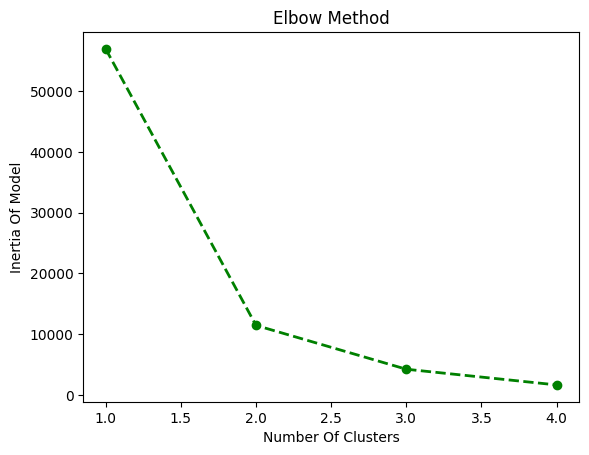

In [163]:
# plot an elbow graph
plt.plot(range(1,5),wcss3,color='green', marker='o',
         linestyle='dashed',linewidth=2, markersize=6)
plt.title("Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("Inertia Of Model")
plt.show()